# Chaînes de Markov : propagation d’une épidémie dans une population
Groupe 3

**Haya MAMLOUK** - 21107689

**Maeva RAMAHATAFANDRY** - 21104443


## 1. Description du premier modèle

1. Dans le cadre de ce modèle épidémique:
- il y'a 3 états: **Sain (S), Infecté (I) et Guéri (R)**. 
- Le vecteur de probabilité initiale est de taille 3 représentant chaque état au temps 0. 
- La matrice de transition est de taille 3 x 3: on peut rentrer selon 3 états (S, I , R) et sortir selon 3 états. 

2. pi0 : vecteur de probabilité initiale:


``` python
    pi0 = [0.9, 0.1, 0.0]
```


3. Matrice de transition 1 contenant les probabilités de transition entre les différentes états:

``` python
    A = numpy.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])
```



In [7]:
# PARAMÈTRES DU CODE
import numpy as np
import random
import matplotlib.pyplot as plt

pi0 = [0.9, 0.1, 0.0]

A = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])


In [8]:
def est_stochastique(A):
    """
    Cette fonction renvoie 1 si A est une matrice stochastique (matrice carrée et la somme des éléments d'une ligne  = 1) et 0 sinon

    Paramètres: 
    ------------
    A : np.array
    Matrice à vérifier

    Returns:
    ------------
    boolean

    """
    sum : int = 0
    if A.shape[0] == A.shape[1]: 
        for i in A: #i = valeur ligne, j = valeur colonne
            for j in i:
                sum += j
            if sum != 1:
                return False
            else :
                sum = 0
        return True
    return False

assert(est_stochastique(A) == True)


### 1.1 Distribution théorique

#### Question 1 : Calcul de la distribution théoriques des états pour t = 1

La probabilité pour un individu d'être **sain** au temps t = 1 est:

$ P(S_1) = P(S_1 | S_0) * P(S_0) = 0.9 * 0.92 = 0.828 $


La probabilité pour un individu d'être **infecté** au temps t = 1 est: 

$   P(I_1) = P(I_1| S_0) * P(S_0) + P(I_1 | I_0) * P(I_0) = 0.08 * 0.9 + 0.93 * 0.1  = 0.072 + 0.093 = 0.165 $


La probabilité pour un individu d'être **guéri** au temps = 1 est:

$   P(R_1) = P(R_1 | I_0) * P(I_0) = 0.07 * 0.1 = 0.007 $



#### Question 2 : Calcul de la distribution théoriques des états pour t = 2

La probabilité pour un individu d'être **sain** au temps t = 2 est:

$   P(S_2) = P(S_2 | S_1) * P(S_1) =  0.92 * 0.828 = 0.762 $ 


La probabilité pour un individu d'être **infecté** au temps t = 2 est: 

$   P(I_2) = P(I_2| S_1) * P(S_1) + P(I_2 | I_1) * P(I_1) = 0.08 * 0.828 + 0.93 * 0.165 = 0.06624 + 0.15345 = 0.21969 $


La probabilité pour un individu d'être **guéri** au temps = 1 est:

$   P(R_2) = P(R_2| I_1) * P(I_1) + P(R_2 | R_1) * P(R_1) = 0.07 * 0.165 + 0.007 * 1 = 0.01855 $


#### Question 3: Calcul des distributions théoriques des états pour t entre 1 et 200

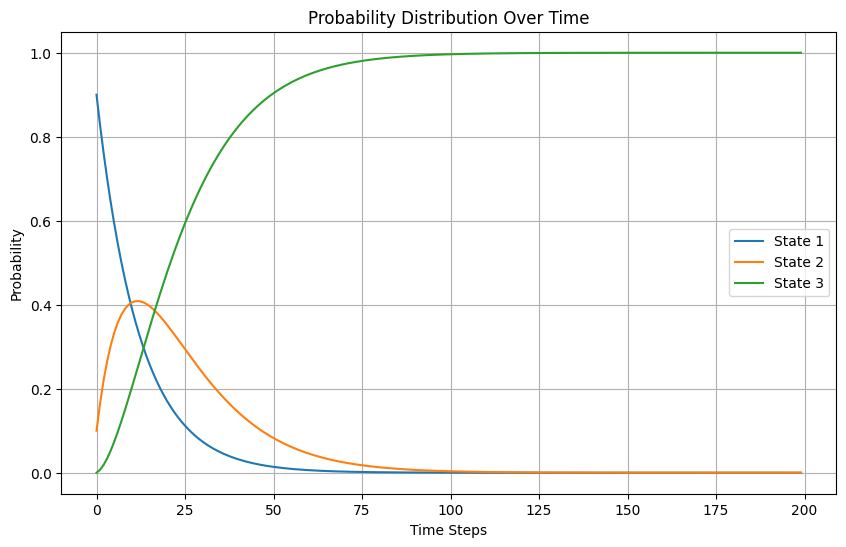

[array([0.9, 0.1, 0. ]),
 array([0.828, 0.165, 0.007]),
 array([0.76176, 0.21969, 0.01855]),
 array([0.7008192, 0.2652525, 0.0339283]),
 array([0.64475366, 0.30275036, 0.05249598]),
 array([0.59317337, 0.33313813, 0.0736885 ]),
 array([0.5457195 , 0.35727233, 0.09700817]),
 array([0.50206194, 0.37592083, 0.12201723]),
 array([0.46189699, 0.38977132, 0.14833169]),
 array([0.42494523, 0.39943909, 0.17561568]),
 array([0.39094961, 0.40547397, 0.20357642]),
 array([0.35967364, 0.40836676, 0.2319596 ]),
 array([0.33089975, 0.40855498, 0.26054527]),
 array([0.30442777, 0.40642811, 0.28914412]),
 array([0.28007355, 0.40233237, 0.31759409]),
 array([0.25766766, 0.39657498, 0.34575735]),
 array([0.23705425, 0.38942815, 0.3735176 ]),
 array([0.21808991, 0.38113252, 0.40077757]),
 array([0.20064272, 0.37190043, 0.42745685]),
 array([0.1845913 , 0.36191882, 0.45348988]),
 array([0.169824  , 0.35135181, 0.4788242 ]),
 array([0.15623808, 0.3403431 , 0.50341882]),
 array([0.14373903, 0.32901813, 0.52

In [10]:
def distribution(A, vect_init):
    liste_distribution = []
    liste_distribution.append(np.array(vect_init))

    for i in range(1, 200): 
        liste_distribution.append(np.dot(liste_distribution[i-1], A))

    #affichage (to review bc copier coller from chatgpt)
    time_steps = np.arange(0, 200)

    plt.figure(figsize=(10, 6))
    for state_index in range(len(vect_init)):
        state_probabilities = [distribution[state_index] for distribution in liste_distribution]
        plt.plot(time_steps, state_probabilities, label=f'State {state_index + 1}')

    plt.title('Probability Distribution Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

    return liste_distribution

distribution(A, pi0)
